<a href="https://colab.research.google.com/github/vignesh7-byte/DataMining/blob/main/2303A51640_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')


In [12]:
data=pd.read_csv("/content/Logistic Regression _diabetes-dataset (1).csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [13]:
print("\nNull Values in Dataset:")
print(data.isnull().sum())


Null Values in Dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
print("\nMean:")
print(data.mean())
print("\nMedian:")
print(data.median())
print("\nMode:")
print(data.mode().iloc[0])


Mean:
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Median:
Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

Mode:
Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction     0.254
Age               

In [15]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = log_reg.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [20]:
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.7532467532467533

Confusion Matrix:
[[87 14]
 [24 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       101
           1       0.67      0.55      0.60        53

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.75       154



In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)


In [23]:
print("\nMSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


MSE: 0.24675324675324675
RMSE: 0.496742636335202
R-squared: -0.09321875583784789
Adjusted R-squared: -0.15353427340131542


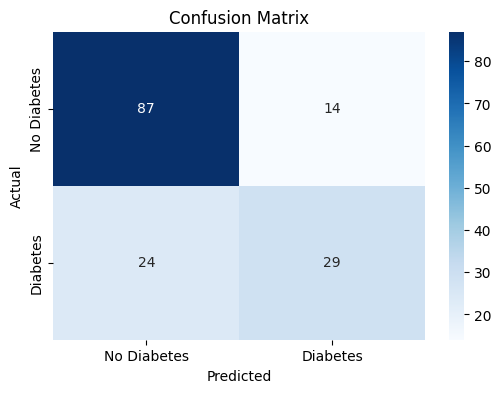

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
